In [1]:
import biolqm
import cabean
from colomoto_jupyter import tabulate

This notebook has been executed using the docker image `colomoto/colomoto-docker:2020-07-01`

In [2]:
model = biolqm.load("https://raw.githubusercontent.com/jgtz/StableMotifs/master/TLGLNetwork.txt", "booleannet")

Downloading https://raw.githubusercontent.com/jgtz/StableMotifs/master/TLGLNetwork.txt

Use the decompositon-based attractor detection method to identify all the exact attractors of the network under the initial condition defined above.

In [3]:
%time cabobj = cabean.load(model)
tabulate(cabean.attractors(cabobj))

CPU times: user 9.62 ms, sys: 7.77 ms, total: 17.4 ms
Wall time: 44.3 s


,A20,Apoptosis,BID,BclxL,CD45,CREB,CTLA4,Caspase,Ceramide,Cytoskeleton_signaling,DISC,ERK,FLIP,FYN,Fas,FasL,FasT,GAP,GPCR,GRB2,GZMB,IAP,IFNG,IFNGT,IL15,IL2,IL2RA,IL2RAT,IL2RB,IL2RBT,JAK,LCK,MCL1,MEK,NFAT,NFKB,P2,P27,PDGF,PDGFR,PI3K,PLCG1,Proliferation,RANTES,RAS,S1P,SMAD,SOCS,SPHK1,STAT3,Stimuli,Stimuli2,TAX,TBET,TCR,TNF,TPL2,TRADD,ZAP70,sFas
0,1,0,0,0,0,0,*,0,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,0,1,*,1,1,0,0,1
1,1,0,0,0,0,0,*,0,0,1,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,0,1,*,1,1,0,0,1
2,1,1,1,0,0,0,*,1,1,1,1,1,0,1,1,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,0,1,1,0,0,0,0,1,1,0,0,1,*,1,1,0,0,0


Define the properties of the source and target attractors. Note that source or target may correspond to serveral attractors.

In [4]:
source = {"Apoptosis": 0}
target = {"Apoptosis": 1}

Compute the minimal one-step instantaneous control (OI) from the source to the target.

In [5]:
r1i = cabean.OneStep_Instantaneous(cabobj)
%time s1i = r1i.attractor_to_attractor(source, target)
s1i

CPU times: user 3.48 ms, sys: 8.33 ms, total: 11.8 ms
Wall time: 15 s


[FromOneInLimitCycle('a0', InstantaneousPerturbation(PDGFR=0, S1P=0, SPHK1=0)),
 FromOneInLimitCycle('a1', InstantaneousPerturbation(PDGFR=0, S1P=0, SPHK1=0))]

In [6]:
s1i.as_table()

,PDGFR,S1P,SPHK1
0,0,0,0


Compute the attractor-based sequential instantaneous control (ASI) from the source to the target.

In [7]:
ri = cabean.AttractorSequential_Instantaneous(cabobj)
%time si = ri.attractor_to_attractor(source, target)
si

CPU times: user 2.97 ms, sys: 9.54 ms, total: 12.5 ms
Wall time: 15.6 s


[FromOneInLimitCycle('a0', InstantaneousPerturbation(PDGFR=0, S1P=0, SPHK1=0)),
 FromOneInLimitCycle('a1', InstantaneousPerturbation(PDGFR=0, S1P=0, SPHK1=0))]

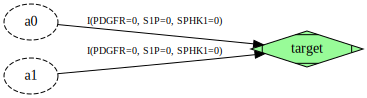

In [8]:
si.as_graph()

In [9]:
si.as_table()

,PDGFR,S1P,SPHK1
0,0,0,0


Compute the minimal one-step temporary control (OT) from the source to the target.

In [10]:
r1t = cabean.OneStep_Temporary(cabobj)
%time s1t = r1t.attractor_to_attractor(source, target)
s1t

CPU times: user 2.59 ms, sys: 10.8 ms, total: 13.4 ms
Wall time: 15.6 s


[FromOneInLimitCycle('a0', TemporaryPerturbation(PDGFR=0)),
 FromOneInLimitCycle('a0', TemporaryPerturbation(S1P=0)),
 FromOneInLimitCycle('a0', TemporaryPerturbation(SPHK1=0)),
 FromOneInLimitCycle('a0', TemporaryPerturbation(Ceramide=1)),
 FromOneInLimitCycle('a1', TemporaryPerturbation(PDGFR=0)),
 FromOneInLimitCycle('a1', TemporaryPerturbation(S1P=0)),
 FromOneInLimitCycle('a1', TemporaryPerturbation(SPHK1=0)),
 FromOneInLimitCycle('a1', TemporaryPerturbation(Ceramide=1))]

In [11]:
s1t.as_table()

,Ceramide,PDGFR,S1P,SPHK1
0,,,,0
1,,,0,
2,,0,,
3,1,,,


Compute the attractor-based sequential temporary control (AST) from the source to the target.

In [12]:
rt = cabean.AttractorSequential_Temporary(cabobj)
%time st = rt.attractor_to_attractor(source, target)
st

CPU times: user 2.62 ms, sys: 10.8 ms, total: 13.4 ms
Wall time: 16.9 s


[FromOneInLimitCycle('a0', TemporaryPerturbation(PDGFR=0)),
 FromOneInLimitCycle('a0', TemporaryPerturbation(S1P=0)),
 FromOneInLimitCycle('a0', TemporaryPerturbation(SPHK1=0)),
 FromOneInLimitCycle('a0', TemporaryPerturbation(Ceramide=1)),
 FromOneInLimitCycle('a1', TemporaryPerturbation(PDGFR=0)),
 FromOneInLimitCycle('a1', TemporaryPerturbation(S1P=0)),
 FromOneInLimitCycle('a1', TemporaryPerturbation(SPHK1=0)),
 FromOneInLimitCycle('a1', TemporaryPerturbation(Ceramide=1))]

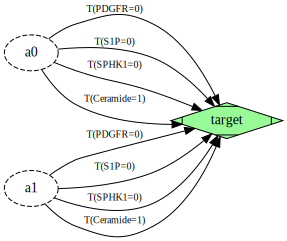

In [13]:
st.as_graph()

In [14]:
st.as_table()

,Ceramide,PDGFR,S1P,SPHK1
0,,,,0
1,,,0,
2,,0,,
3,1,,,


Compute the minimal one-step permanent control (OP) from the source to the target.

In [15]:
r1p = cabean.OneStep_Permanent(cabobj)
%time s1p = r1p.attractor_to_attractor(source, target)
s1p

CPU times: user 5.69 ms, sys: 7.5 ms, total: 13.2 ms
Wall time: 19.6 s


[FromOneInLimitCycle('a0', PermanentPerturbation(PDGFR=0)),
 FromOneInLimitCycle('a0', PermanentPerturbation(S1P=0)),
 FromOneInLimitCycle('a0', PermanentPerturbation(SPHK1=0)),
 FromOneInLimitCycle('a0', PermanentPerturbation(Ceramide=1)),
 FromOneInLimitCycle('a1', PermanentPerturbation(PDGFR=0)),
 FromOneInLimitCycle('a1', PermanentPerturbation(S1P=0)),
 FromOneInLimitCycle('a1', PermanentPerturbation(SPHK1=0)),
 FromOneInLimitCycle('a1', PermanentPerturbation(Ceramide=1))]

In [16]:
s1p.as_table()

,Ceramide,PDGFR,S1P,SPHK1
0,,,,0
1,,,0,
2,,0,,
3,1,,,


Compute the attractor-based sequential permanent control (ASP) from the source to the target.

In [17]:
rp = cabean.AttractorSequential_Permanent(cabobj)
%time sp = rp.attractor_to_attractor(source, target)
sp

CPU times: user 5.23 ms, sys: 8.69 ms, total: 13.9 ms
Wall time: 24.3 s


[FromOneInLimitCycle('a0', PermanentPerturbation(PDGFR=0)),
 FromOneInLimitCycle('a0', PermanentPerturbation(S1P=0)),
 FromOneInLimitCycle('a0', PermanentPerturbation(SPHK1=0)),
 FromOneInLimitCycle('a0', PermanentPerturbation(Ceramide=1)),
 FromOneInLimitCycle('a1', PermanentPerturbation(PDGFR=0)),
 FromOneInLimitCycle('a1', PermanentPerturbation(S1P=0)),
 FromOneInLimitCycle('a1', PermanentPerturbation(SPHK1=0)),
 FromOneInLimitCycle('a1', PermanentPerturbation(Ceramide=1))]

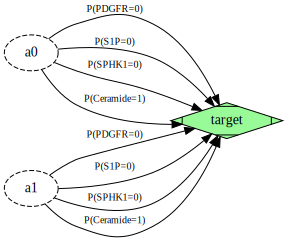

In [18]:
sp.as_graph()

In [19]:
sp.as_table()

,Ceramide,PDGFR,S1P,SPHK1
0,,,,0
1,,,0,
2,,0,,
3,1,,,
